<a href="https://colab.research.google.com/github/kevineladio/TELLER/blob/master/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
predictions = '/content/sales_predictions.csv'
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(predictions)


 ¿Cuántas filas y columnas?

In [5]:
df.shape

(8523, 12)

 ¿Cuáles son los tipos de datos en cada variable?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [7]:
df.duplicated().sum() #suma la lista de los valores  duplicados por fila

0

No hay valores duplicados, pero de ser el caso esta seria la formula para borrarlos

In [8]:
#remover duplicados 
df = df.drop_duplicates() #CD = CLEAN DATA
df.duplicated().sum() #comprobar si existen duplicados nuevamente

0

Identifiquen los valores faltantes.

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Si se encuentran datos duplicados en los items de Item_Weight  y outlet_Size

 Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [10]:
df['Item_Weight'].fillna(0, inplace=True)
df['Outlet_Size'].fillna('Missing', inplace=True)
#Decidi reemplazarlos por 0 y por Missing

Confirmen que no hay valores faltantes después de abordarlos.

In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

 Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


No hay inconsistencias con los datos

Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histograma para ver las distribuciones de diversas características en el conjunto de datos.

<Axes: >

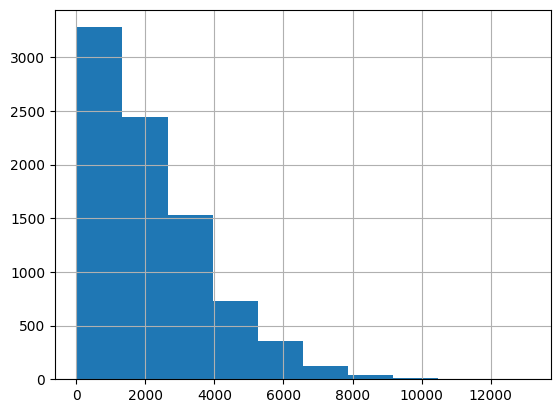

In [14]:
df['Item_Outlet_Sales'].hist()

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f997923e430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f997923e970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f997923e190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f997bad89a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f997923ed60>],
 'means': []}

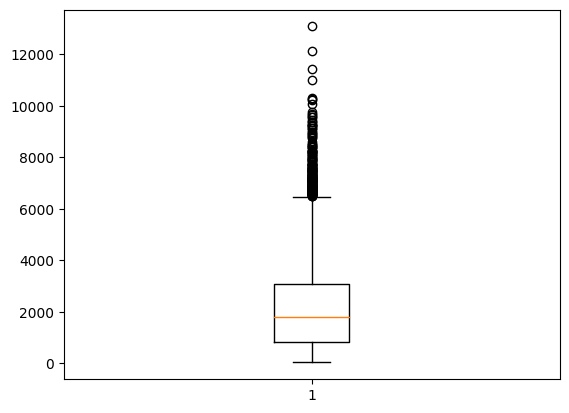

In [15]:
plt.boxplot(df["Item_Outlet_Sales"])

Mapa de calor de la correlación entre las características.

<ipython-input-16-66653ab7094f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

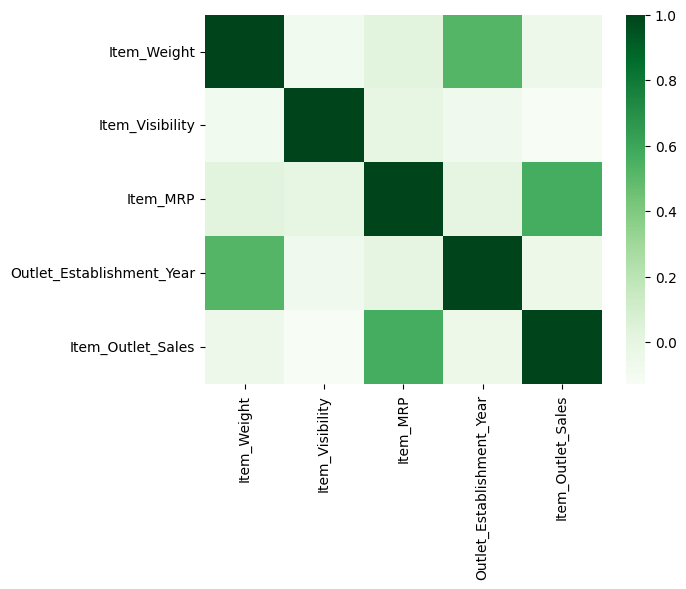

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')